<a id="toc"></a>

# <u>Table of Contents</u>

1.) [Setup](#setup)  
&nbsp;&nbsp;&nbsp;&nbsp; 1.1.) [Standard Imports](#imports)   
&nbsp;&nbsp;&nbsp;&nbsp; 1.2.) [Visualization Imports](#imports)   
&nbsp;&nbsp;&nbsp;&nbsp; 1.3.) [Helpers](#helpers)   
&nbsp;&nbsp;&nbsp;&nbsp; 1.4.) [Load data](#load)   
2.) [General Overview](#general)  
&nbsp;&nbsp;&nbsp;&nbsp; 2.1.) [Timezone](#timezone)   
&nbsp;&nbsp;&nbsp;&nbsp; 2.2.) [Oldest Transcript](#oldest)   

---
<a id="setup"></a>

# [^](#toc) <u>Setup</u>

<a id="imports"></a>

### [^](#toc) Standard imports

In [3]:
### Standard imports
import pandas as pd
import numpy as np
pd.options.display.max_columns = 50

### Regex and datetime
import re
import datetime

# Helps convert String representation of list into a list
import ast

### Removes warnings that occassionally show in imports
import warnings
warnings.filterwarnings('ignore')

<a id="vis_imports"></a>

### [^](#toc) Visualization imports

In [4]:
### Standard imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

### Altair
import altair as alt
alt.renderers.enable('notebook')

### Plotly
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

# WordCloud
from wordcloud import WordCloud

# Folium
import folium

<a id="helpers"></a>

### [^](#toc) Helpers

In [5]:
def string_literal(x):
    try:
        return ast.literal_eval(x)
    except:
        return x
    
# A short hand way to plot most bar graphs
def pretty_bar(data, ax, xlabel=None, ylabel=None, title=None, int_text=False, x=None, y=None):
    
    if x is None:
        x = data.values
    if y is None:
        y = data.index
    
    # Plots the data
    fig = sns.barplot(x, y, ax=ax)
    
    # Places text for each value in data
    for i, v in enumerate(x):
        
        # Decides whether the text should be rounded or left as floats
        if int_text:
            ax.text(0, i, int(v), color='k', fontsize=14)
        else:
            ax.text(0, i, round(v, 3), color='k', fontsize=14)
     
    ### Labels plot
    ylabel != None and fig.set(ylabel=ylabel)
    xlabel != None and fig.set(xlabel=xlabel)
    title != None and fig.set(title=title)

def pretty_transcript(transcript, convert_name=False):
    for speaker in transcript:
        if convert_name:
            speaker[0] = clean_names(speaker[0])
        print(color.UNDERLINE, speaker[0] + ":", color.END)
        for txt in speaker[1:]:
            print("  ", " ".join(txt))
        print()
    
### Used to style Python print statements
class color:
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

<a id="load"></a>

### [^](#toc) Load data

In [56]:
dateparse = lambda x: pd.datetime.strptime(x, "%Y-%m-%d %H:%M:%S")

df = pd.read_csv("data/PBS-newhour-clean.csv", parse_dates=['Date'], date_parser=dateparse)
for col in ["Transcript", "Story", "Speakers"]:
    df[col] = df[col].map(string_literal)

df.Speakers = df.Speakers.map(set)

print("Shape of df:", df.shape)
df.head()

Shape of df: (17617, 8)


,URL,Story,Date,Title,Transcript,Speakers,Number of Comments,Timezone
0,https://www.pbs.org/newshour/show/robert-macne...,“How high did the scandals reach and was Presi...,1973-05-17 02:26:00,Watergate: The NewsHour’s 1973 Special Report,[],{},0.0,EDT
1,https://www.pbs.org/newshour/show/tempers-flar...,This MacNeil/Lehrer Report piece highlights th...,1979-06-29 06:00:00,Tempers Flare In Lines for Gasoline in 1979,[],{},0.0,EDT
2,https://www.pbs.org/newshour/show/margaret-tha...,Robert MacNeil and Jim Lehrer interviewed Brit...,1981-02-27 06:00:00,Newsmaker: Margaret Thatcher,[],{},0.0,EDT
3,https://www.pbs.org/newshour/show/macneil-lehr...,Jim Lehrer and Charlene Hunter Gault report on...,1982-10-25 06:00:00,"The MacNeil/Lehrer Report – October 25, 1982 –...",[],{},0.0,EDT
4,https://www.pbs.org/newshour/show/the-macneil-...,Robert MacNeil and Charlayne Hunter Gault repo...,1983-11-30 06:00:00,"The MacNeil/Lehrer Report from Nov. 30, 1983 o...",[],{},0.0,EDT


<a id="general"></a>

# [^](#toc) <u>General Overview</u>

<a id="timezone"></a>

### [^](#toc) Timezone

In [57]:
df.Timezone.value_counts()

EDT    17617
Name: Timezone, dtype: int64

<a id="oldest_clip"></a>

### [^](#toc) Oldest Clip

In [61]:
temp = df.iloc[0]

print(temp.Title)
print(temp.URL)

Watergate: The NewsHour’s 1973 Special Report
https://www.pbs.org/newshour/show/robert-macneil-and-jim-lehrer-and-the-watergate-hearings


<a id="oldest_transcript"></a>

### [^](#toc) Oldest Transcript

The oldest complete transcript on PBS's website is an interview with Fidel Castro in February of 1985.

In [11]:
temp = df[df.Transcript.map(lambda x: x != [])].iloc[0]

print(f"{color.BOLD}{temp.Date}{color.END}")
print(f"{color.BOLD}{temp.Title}{color.END}")
print()
pretty_transcript(temp.Transcript)

1985-02-11 06:00:00
Robert MacNeil Interviews Fidel Castro Part I

 ROBERT MacNEIL: 
    Our major focus section tonight is a newsmaker interview with Cuban President Fidel Castro. Last month the U.S. and Cuba successfully negotiated an agreement under which Cuba will take back 2,500 “undesirables” who came in the Mariel boat lift of 1980, and the United States will reopen normal immigration procedures in Havana. Since then Castro has said he’d be willing to talk further about improving relations. Washington has reacted coldly, saying Castro is saying nothing new, and it wants to see Cuban deeds, not words. How far Castro wishes to push his new effort has not been clear, but in Havana part of his motivation is obvious. Havana today expresses the weaknesses of the Cuban revolution. Its successes are in the countryside, where better nutrition, health care and education have changed more lives. Havana, the symbol of the decadent past, was neglected, with little new building. But with an e

<a id="old_5"></a>

### [^](#toc) 5 Oldest Stories


In [18]:
for i in range(5):
    print(df.iloc[i].Date)
    print(df.iloc[i].Story)
    print()

1973-05-17 02:26:00
“How high did the scandals reach and was President Nixon himself involved?” That was what the NewsHour’s Robert MacNeil, then co-anchoring with Jim Lehrer, dubbed “the ultimate question” as the program began its gavel-to-gavel coverage of the Watergate hearings on May 17, 1973.

1979-06-29 06:00:00
This MacNeil/Lehrer Report piece highlights the anguish caused by gas shortages at a station in Queens, New York in 1979.

1981-02-27 06:00:00
Robert MacNeil and Jim Lehrer interviewed British Prime Minister Margaret Thatcher for the The MacNeil/Lehrer Report in February of 1981.

1982-10-25 06:00:00
Jim Lehrer and Charlene Hunter Gault report on violence and instability across Guatemala and the actions of Efrain Rios Montt. Gavin Hewitt from the Canadian Broadcasting Corporation reports from Guatemala. Guests are Georges Fauriol of Georgetown University and Dana Martin of the Washington Office on Latin America.

1983-11-30 06:00:00
Robert MacNeil and Charlayne Hunter Gau

### Date spread

The activity starts around April 2011, so we have 7 years of history to analyze

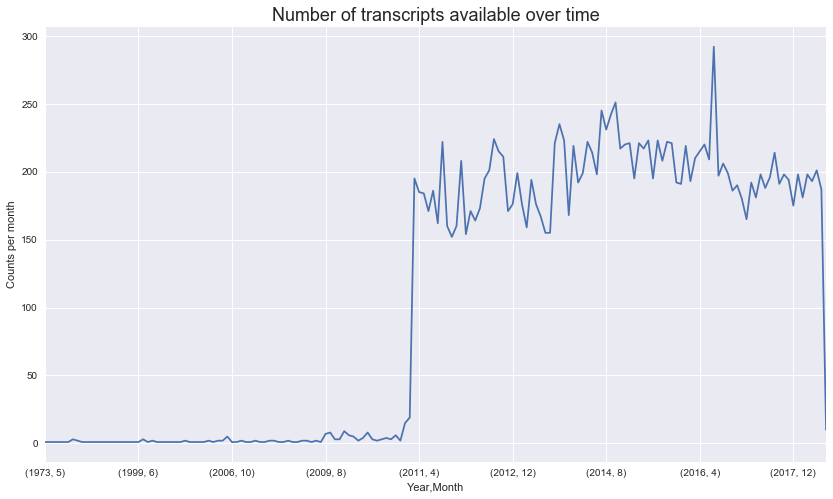

In [34]:
df["Year"]  = df.Date.map(lambda x: x.year)
df["Month"] = df.Date.map(lambda x: x.month)

plt.figure(figsize=(14, 8))
plt.title("Number of transcripts available over time", fontsize=18)

(df
    .assign(n=0)
    .groupby(["Year", "Month"])
    .n
    .apply(len)
    .sort_index()
         ).plot().set(ylabel="Counts per month");

### Earliest mention

I think it's amazing just looking back 7 years.  So much has changed, but in another sense, not much has changed.

The earliest mention of Donald Trump is in 2011 when he was demanding Obama for his birth certificate.  During that segment he is considering running for office. ([link](https://www.pbs.org/newshour/show/with-birth-certificate-release-obama-urges-shift-in-national-dialogue)).  This is tangetial, but this [clip](https://www.pbs.org/newshour/show/with-birth-certificate-release-obama-urges-shift-in-national-dialogue) also features PBS' Jim Lehrer 40 years earlier.

The earliest mention of Bernie Sanders

In [80]:
{x for x in set.union(*df.Speakers) if "BEZOS" in x}

{'JEFF BEZOS'}

In [84]:
### These are just examples
pois = {0: "BERNIE SANDERS",
        1: "VLADIMIR PUTIN",
        2: "DONALD TRUMP",
        3: "JUDY WOODRUFF",
        4: "BEN CARSON",
        5: "STEPHEN COLBERT",
        6: "HILLARY CLINTON",
        7: "JOHN F. KENNEDY",
        8: "ANGELA MERKEL",
        9: "JEFF BEZOS",
        10: "XI JINPING"
}

poi = pois[10]

print("Showing results for:", poi)
df[df.Speakers.map(lambda x: poi in x)].URL

Showing results for: XI JINPING


5176     https://www.pbs.org/newshour/show/u-s-works-on...
5909     https://www.pbs.org/newshour/show/will-obama-s...
6317     https://www.pbs.org/newshour/show/news-wrap-bi...
8756     https://www.pbs.org/newshour/show/news-wrap-so...
8759     https://www.pbs.org/newshour/show/u-s-china-pl...
10968         https://www.pbs.org/newshour/show/newswrap-3
10996        https://www.pbs.org/newshour/show/china-visit
11371    https://www.pbs.org/newshour/show/news-wrap-wh...
11444    https://www.pbs.org/newshour/show/paris-climat...
12255    https://www.pbs.org/newshour/show/signs-of-gro...
12907    https://www.pbs.org/newshour/show/news-wrap-is...
13418    https://www.pbs.org/newshour/show/successes-sh...
14754    https://www.pbs.org/newshour/show/trump-chinas...
15276    https://www.pbs.org/newshour/show/news-wrap-tr...
15995    https://www.pbs.org/newshour/show/xi-jinping-c...
16035    https://www.pbs.org/newshour/show/news-wrap-se...
16140    https://www.pbs.org/newshour/show/did-trump-an.